In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
IMG_SIZE = (224, 224)

def load_dataset(base_dir):
    X, Y = [], []

    for label in ["0", "1", "2"]:
        cls_dir = os.path.join(base_dir, label)
        for img_name in os.listdir(cls_dir):
            if img_name.lower().endswith((".jpg",".png",".jpeg")):
                img_path = os.path.join(cls_dir, img_name)
                img = cv2.imread(img_path)
                if img is None:
                    continue

                img = cv2.resize(img, IMG_SIZE)
                img = img / 255.0  # normalize

                X.append(img)
                Y.append(int(label))

    return np.array(X), np.array(Y)

# Load train & test
X_train, Y_train = load_dataset("Final_Dataset/train")
X_test,  Y_test  = load_dataset("Final_Dataset/test")

# Print shapes
print("Train:", X_train.shape, Y_train.shape)
print("Test :", X_test.shape, Y_test.shape)


Train: (1782, 224, 224, 3) (1782,)
Test : (69, 224, 224, 3) (69,)


In [ ]:
class_names = ['Valo_Chele_Meheraj', 'Vondo_Oni', 'Amit']

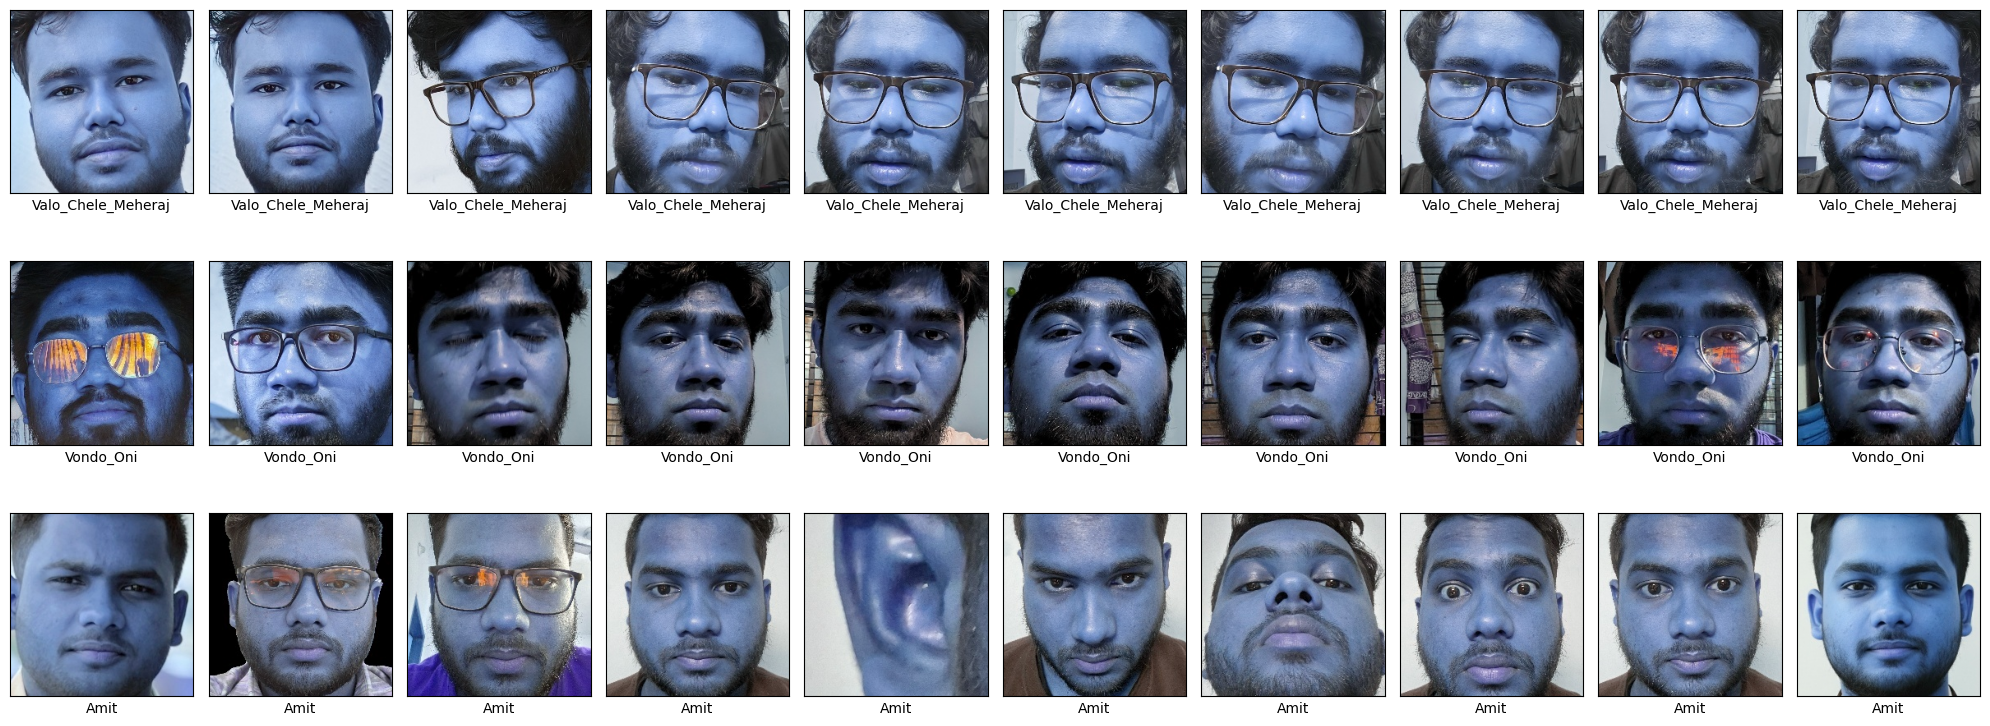

In [4]:
plt.figure(figsize=(20,8))

row = 0
col = 0
subplot_idx = 1

for cls in [0, 1, 2]:
    count = 0
    for i in range(len(X_train)):
        if Y_train[i] == cls:
            plt.subplot(3, 10, subplot_idx)
            plt.imshow(X_train[i])
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(class_names[cls])

            subplot_idx += 1
            count += 1

            if count == 10:   
                break

plt.tight_layout()
plt.show()


In [ ]:
model = keras.Sequential([
    keras.Input(shape=(224,224,3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')   # multiclass
])

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 29s 598ms/step - accuracy: 0.8112 - loss: 0.4693 - val_accuracy: 0.4342 - val_loss: 2.0164
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 612ms/step - accuracy: 0.9804 - loss: 0.0767 - val_accuracy: 0.7423 - val_loss: 0.9551
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 566ms/step - accuracy: 0.9923 - loss: 0.0276 - val_accuracy: 0.9216 - val_loss: 0.2696
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 557ms/step - accuracy: 0.9923 - loss: 0.0235 - val_accuracy: 0.8571 - val_loss: 0.4822
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 570ms/step - accuracy: 0.9993 - loss: 0.0053 - val_accuracy: 0.9216 - val_loss: 0.3869


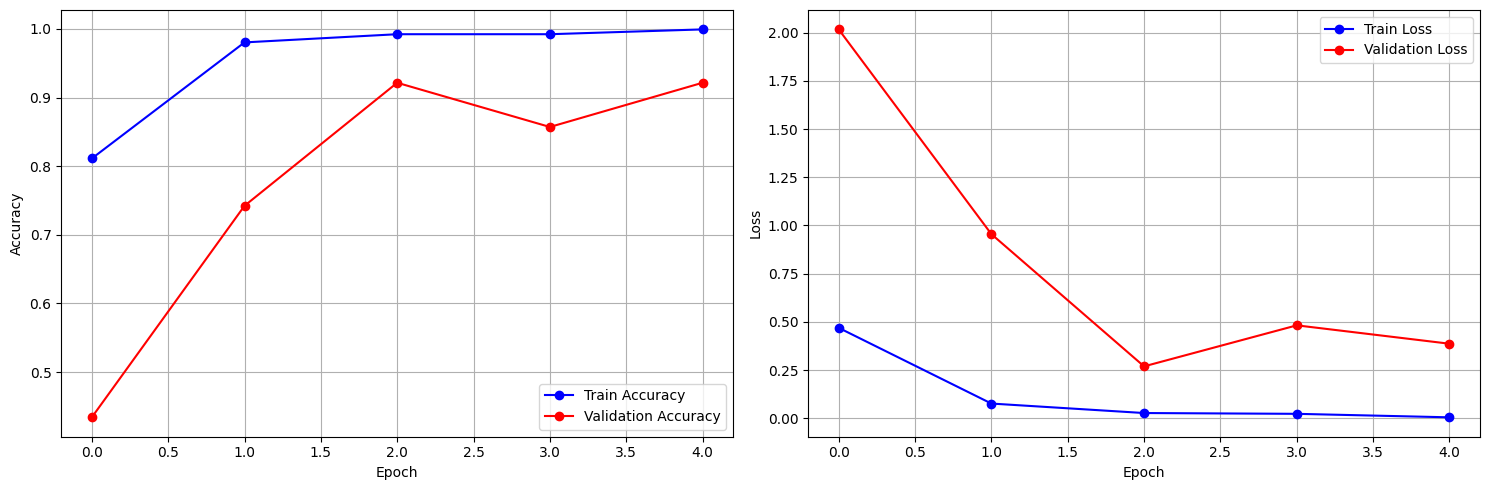

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', color='blue', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', color='red', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', color='blue', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9855 - loss: 0.0129     

Test Accuracy: 0.9855072498321533

Test Loss: 0.012870258651673794


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step 


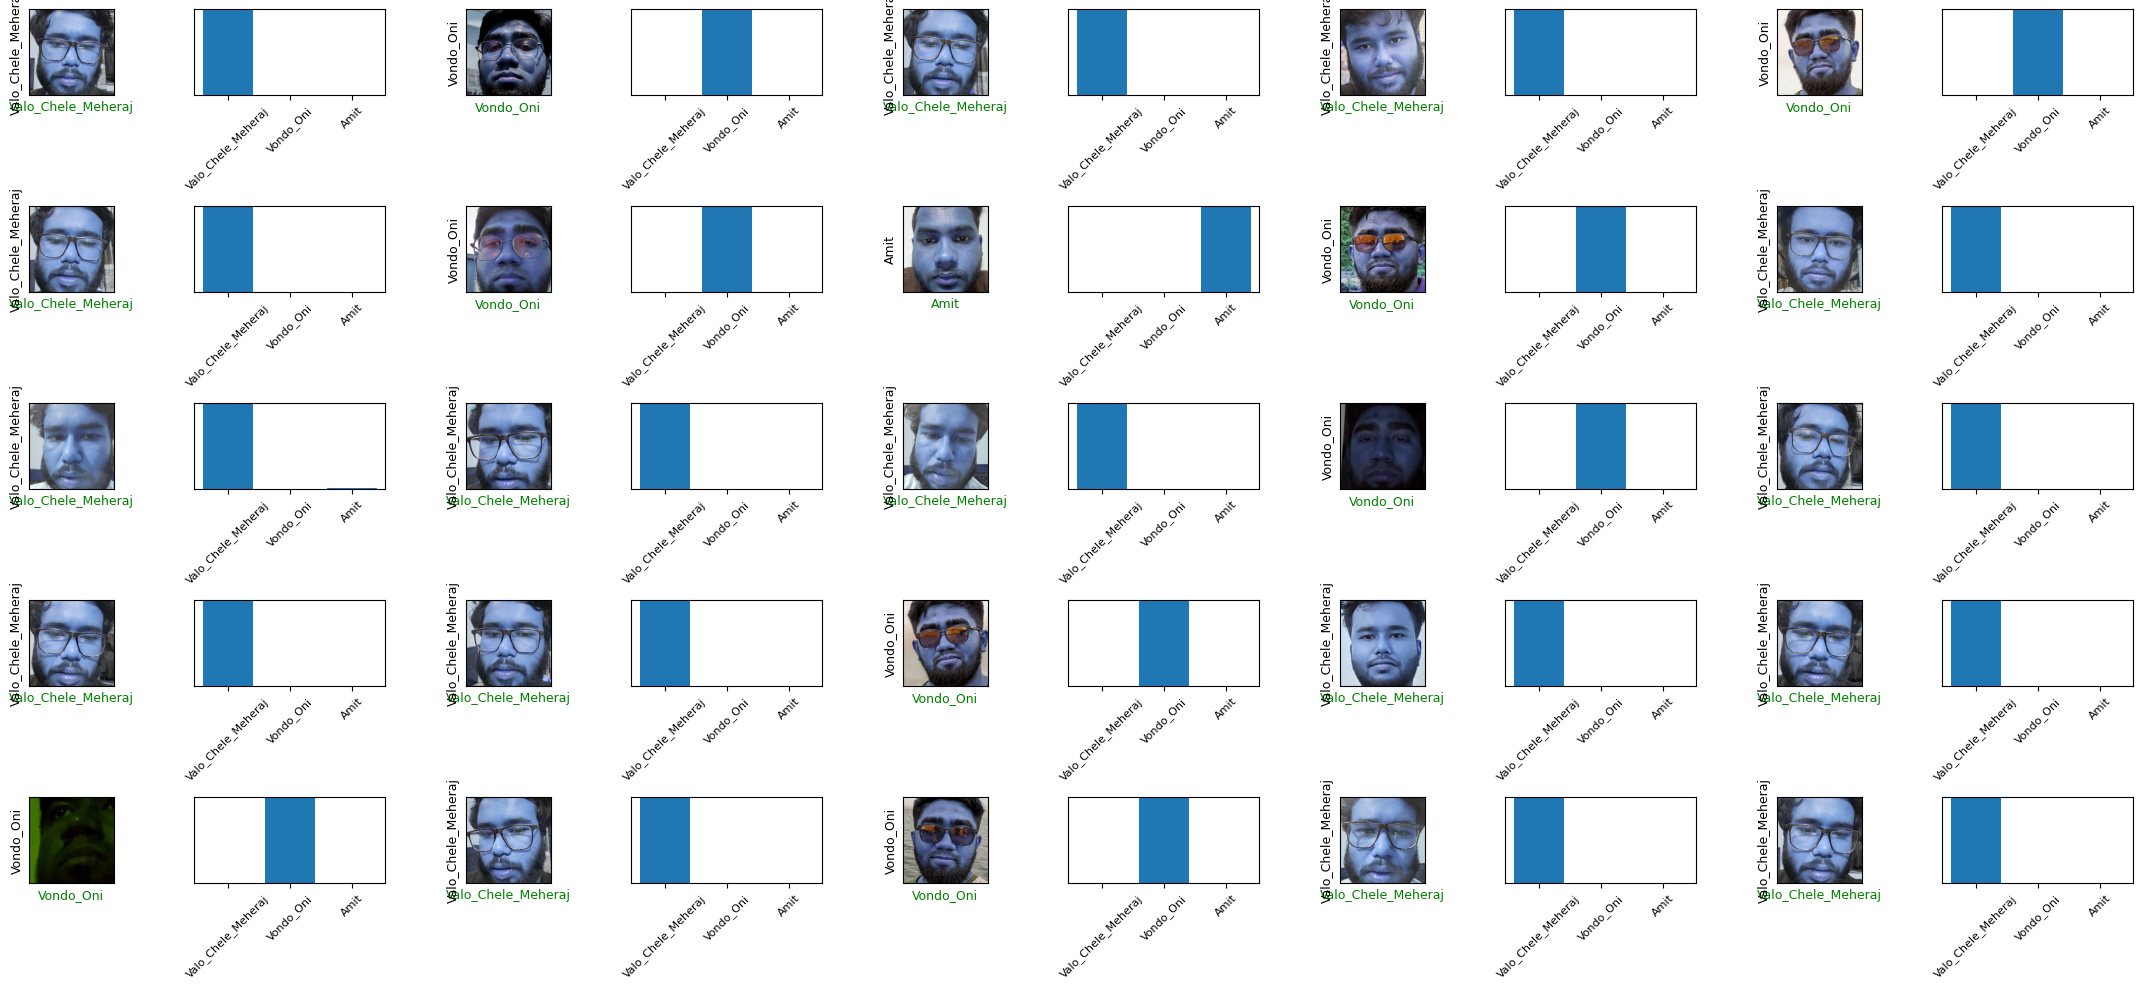

In [11]:
import numpy as np
import matplotlib.pyplot as plt

rows = 5
cols = 5

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

num_images = min(25, len(X_test))

plt.figure(figsize=(22, 10))

idxs = np.random.choice(len(X_test), num_images, replace=False)

for j, i in enumerate(idxs):

    # IMAGE
    plt.subplot(rows, 2*cols, 2*j + 1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])

    true_label = Y_test[i]
    pred_label = y_pred[i]

    # true label (left, vertical)
    plt.ylabel(class_names[true_label], fontsize=9)

    # predicted label (bottom)
    color = 'green' if true_label == pred_label else 'red'
    plt.xlabel(class_names[pred_label], color=color, fontsize=9)

    # PROBABILITY BAR
    plt.subplot(rows, 2*cols, 2*j + 2)
    plt.bar([0, 1, 2], y_prob[i])
    plt.xticks([0, 1, 2], class_names, rotation=45, fontsize=8)
    plt.ylim([0, 1])
    plt.yticks([])

plt.tight_layout()
plt.show()


In [12]:
model.save("face_classifier.keras")

In [13]:
import json

class_names = ['Valo_Chele_Meheraj', 'Vondo_Oni', 'Amit']

with open("class_names.json", "w") as f:
    json.dump(class_names, f)

print("class_names.json saved!")


class_names.json saved!
